## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('future.no_silent_downcasting', True)

## Importing the dataset

In [2]:
df1 = pd.read_excel('data.xls')
df1.replace('?', np.nan, inplace=True)

df2 = pd.read_excel('Additional Fields.xlsx')

df = pd.concat([df2, df1], axis=1)

#No need for this column
df.drop(columns=["NMID"], inplace=True)

In [3]:
df.head(10)

,Country,Gender,Edu,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,Germany,Male,High,0,0,0,1,1,0,0,...,5,5,5,5,5,5,5,3,3,A
1,Germany,Male,Middle,1,0,0,1,0,0,1,...,4,2,4,2,2,2,2,3,3,D
2,Germany,Female,Middle,1,1,0,1,0,0,1,...,4,4,NaN,NaN,4,2,4,4,1,A
3,Germany,Female,Middle,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,C
4,Germany,Female,Middle,1,1,0,1,0,0,1,...,NaN,NaN,1,1,NaN,NaN,NaN,3,3,D
5,Germany,Male,Middle,0,1,0,0,0,0,0,...,4,4,4,4,4,4,4,3,3,B
6,Germany,Male,Middle,1,0,0,1,1,0,1,...,5,1,5,3,5,3,3,3,1,A
7,Germany,Female,Middle,1,0,1,0,1,1,1,...,3,2,5,5,5,5,5,5,1,A
8,Germany,Female,Middle,1,1,0,0,0,0,1,...,2,2,2,2,2,2,3,1,2,A
9,Germany,Male,Middle,1,0,0,0,0,0,0,...,4,1,4,1,4,1,1,4,4,A


## Data Preprocessing


### Data Analysis

In [4]:
df.describe()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q13_15,Q13_16,Q13_Dont_Know,Q20,Q21
count,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,...,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000
mean,0.479044,0.295678,0.178782,0.584152,0.280779,0.089555,0.379993,0.302227,0.076130,0.433366,...,0.073838,0.253602,0.124263,0.242960,0.379339,0.023248,0.088900,0.055992,2.870825,2.596758
std,0.499602,0.456384,0.383201,0.492908,0.449417,0.285566,0.485425,0.459261,0.265227,0.495581,...,0.261528,0.435108,0.329909,0.428906,0.485262,0.150703,0.284622,0.229925,0.811442,0.834790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108 entries, 0 to 6107
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        6108 non-null   object
 1   Gender         6108 non-null   object
 2   Edu            6108 non-null   object
 3   Q11_1          6108 non-null   int64 
 4   Q11_2          6108 non-null   int64 
 5   Q11_3          6108 non-null   int64 
 6   Q11_4          6108 non-null   int64 
 7   Q11_5          6108 non-null   int64 
 8   Q11_6          6108 non-null   int64 
 9   Q11_7          6108 non-null   int64 
 10  Q11_8          6108 non-null   int64 
 11  Q11_9          6108 non-null   int64 
 12  Q11_10         6108 non-null   int64 
 13  Q11_11         6108 non-null   int64 
 14  Q11_12         6108 non-null   int64 
 15  Q11_13         6108 non-null   int64 
 16  Q11_Dont_Know  6108 non-null   int64 
 17  Q12_1          6108 non-null   int64 
 18  Q12_2          6108 non-null

In [6]:
df["Country"].value_counts()

Country
Germany    1539
Hungary    1539
Denmark    1532
Norway     1498
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
Female    3136
Male      2972
Name: count, dtype: int64

In [8]:
df["Edu"].value_counts()

Edu
Middle    2918
High      1827
Low       1363
Name: count, dtype: int64

In [9]:
df["Q16"].value_counts()

Q16
A    2883
B    1526
C     892
D     807
Name: count, dtype: int64

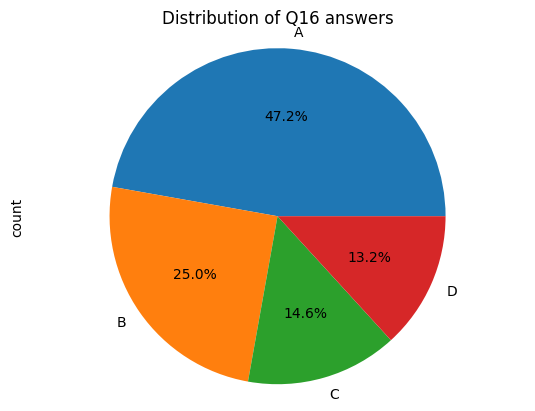

In [10]:
df["Q16"].value_counts().plot.pie(autopct='%1.1f%%')

plt.title("Distribution of Q16 answers")
plt.axis('equal')
plt.show()

### Transforming the dataset for Binary Classifaciton

A and B labels as 1. C and D labels as 0

In [11]:
# Define a mapping dictionary
mapping = {'A': 1, 'B': 1, 'C': 0, 'D': 0}

# Apply the mapping to the target variable
df['Q16'] = df['Q16'].map(mapping)

In [12]:
df.head(10)

,Country,Gender,Edu,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,Germany,Male,High,0,0,0,1,1,0,0,...,5,5,5,5,5,5,5,3,3,1
1,Germany,Male,Middle,1,0,0,1,0,0,1,...,4,2,4,2,2,2,2,3,3,0
2,Germany,Female,Middle,1,1,0,1,0,0,1,...,4,4,NaN,NaN,4,2,4,4,1,1
3,Germany,Female,Middle,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,0
4,Germany,Female,Middle,1,1,0,1,0,0,1,...,NaN,NaN,1,1,NaN,NaN,NaN,3,3,0
5,Germany,Male,Middle,0,1,0,0,0,0,0,...,4,4,4,4,4,4,4,3,3,1
6,Germany,Male,Middle,1,0,0,1,1,0,1,...,5,1,5,3,5,3,3,3,1,1
7,Germany,Female,Middle,1,0,1,0,1,1,1,...,3,2,5,5,5,5,5,5,1,1
8,Germany,Female,Middle,1,1,0,0,0,0,1,...,2,2,2,2,2,2,3,1,2,1
9,Germany,Male,Middle,1,0,0,0,0,0,0,...,4,1,4,1,4,1,1,4,4,1


In [13]:
df["Q16"].value_counts()

Q16
1    4409
0    1699
Name: count, dtype: int64

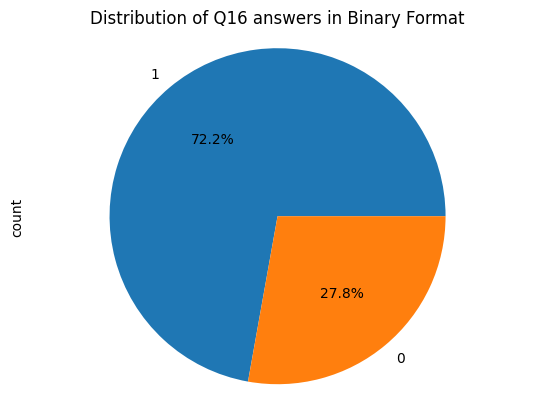

In [14]:
df["Q16"].value_counts().plot.pie(autopct='%1.1f%%')

plt.title("Distribution of Q16 answers in Binary Format")
plt.axis('equal')
plt.show()

### Filitering the data

In [15]:
columnToFilter = "country"
itemToFilter = "germany"

columnToFilter = columnToFilter.capitalize()
itemToFilter = itemToFilter.capitalize()

df = df[df[columnToFilter] == itemToFilter].reset_index(drop=True)
df.drop(columns=["Country","Gender","Edu"], inplace=True)

In [16]:
print(f"Dataset has been filtered by {columnToFilter} column with {itemToFilter} value")

Dataset has been filtered by Country column with Germany value


In [17]:
df

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5,5,5,5,5,5,5,3,3,1
1,1,0,0,1,0,0,1,0,0,1,...,4,2,4,2,2,2,2,3,3,0
2,1,1,0,1,0,0,1,1,0,1,...,4,4,NaN,NaN,4,2,4,4,1,1
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,0
4,1,1,0,1,0,0,1,1,0,1,...,NaN,NaN,1,1,NaN,NaN,NaN,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,1,1,1,1,1,1,1,0,0,1,...,3,1,3,1,3,1,1,3,4,0
1535,0,1,0,0,0,1,1,0,0,0,...,4,2,4,1,3,3,3,3,3,1
1536,0,0,0,0,1,0,0,0,0,0,...,3,3,3,3,3,3,3,2,3,1
1537,0,0,1,1,0,0,0,0,0,1,...,3,3,3,3,3,3,3,3,3,1


In [18]:
df["Q16"].value_counts()

Q16
1    1047
0     492
Name: count, dtype: int64

### Taking care of missing data

In [19]:
df.fillna(df.mode().iloc[0], inplace=True) #replacing the nan values with the mode of each colmun

### Balancing the imbalanced data

In [20]:
from imblearn.over_sampling import SMOTE

random_over_sampler = SMOTE(random_state=42)

y = df['Q16']
X = df.drop(['Q16'],axis=1)

# Get the column names of the features
feature_names = X.columns

X_resampled , y_resampled = random_over_sampler.fit_resample(X,y)
#generating data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Q16'] = y_resampled

In [21]:
balanced_df["Q16"].value_counts()

Q16
1    1047
0    1047
Name: count, dtype: int64

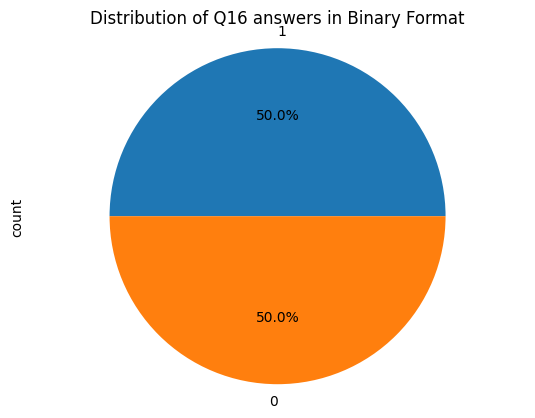

In [22]:
balanced_df["Q16"].value_counts().plot.pie(autopct='%1.1f%%')

plt.title("Distribution of Q16 answers in Binary Format")
plt.axis('equal')
plt.show()

## Creating X(independent) and Y(dependent)

In [23]:

y = balanced_df['Q16'].values
X = balanced_df.drop(['Q16'],axis=1).values

## Spliting the dataset into the training set and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(1675, 74)
(419, 74)


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train)

[[ 1.0724703   1.871547   -0.50093266 ... -0.15228381 -1.04294592
  -2.1945244 ]
 [ 1.0724703  -0.53431733 -0.50093266 ... -0.15228381  0.25492512
   0.17315893]
 [ 1.0724703   1.871547   -0.50093266 ... -0.15228381  1.55279616
  -1.01068274]
 ...
 [-0.93242675 -0.53431733 -0.50093266 ... -0.15228381  0.25492512
   1.3570006 ]
 [-0.93242675 -0.53431733 -0.50093266 ... -0.15228381 -1.04294592
  -1.01068274]
 [-0.93242675 -0.53431733 -0.50093266 ... -1.14400049 -1.04294592
   1.3570006 ]]


## Baseline Function To Evaluate Metrics

In [28]:
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

def evaluatePerformance(classifier):
    #Fit the model
    classifier.fit(X_train, y_train)

    #predict the x test
    y_pred = classifier.predict(X_test)
    
    #Calculating the mcc value
    mcc = matthews_corrcoef(y_test, y_pred)

    #Calculating the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculating precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #print the classifiaction report
    classification_report_result = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_report_result)
    print(f"Matthews Corrcoef: {mcc: .4f}", )
    print(f"Accuracy Score: {accuracy: .4f}")

    if hasattr(classifier, "decision_function"):
        probs = classifier.decision_function(X_test) 
    elif hasattr(classifier, "predict_proba"):
        probs = classifier.predict_proba(X_test) [:,1]
        
    fpr,tpr,threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc,color="darkorange")
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {classifier.__class__.__name__}. ({columnToFilter}: {itemToFilter})")
    plt.show()


    if classifier.__class__.__name__ == "RandomForestClassifier":
        importances = classifier.feature_importances_
        
        indices = np.argsort(importances)[::-1]
        
        print("Feature ranking:")
        for f in range(5):
            print(f"{f + 1}. Feature {feature_names[indices[f]]}")

    print()
    

    return [accuracy, f1, precision, recall, roc_auc, mcc]

## Baseline Function To Perform Cross Validation

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def evaluatePerformance_crossVal(classifier):
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store accuracy scores
    accuracy_scores = []

    fold_number = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Apply standard scaling to the training data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        
        # Use the same scaler to transform the test data
        X_test = scaler.transform(X_test)
    
        # Fit the model on the scaled training data
        classifier.fit(X_train, y_train)
    
        # predicting the X_test
        y_pred = classifier.predict(X_test)
    
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {fold_number}. fold: {accuracy:.4f}")
        accuracy_scores.append(accuracy)
        fold_number += 1
     
    print(f'Cross Validation Mean Accuracy: {np.mean(accuracy_scores):.4f}')

    return np.mean(accuracy_scores)

## Evalutaing the performance of the models


Evaluation for RandomForestClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       209
           1       0.88      0.91      0.90       210

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419

Matthews Corrcoef:  0.7952
Accuracy Score:  0.8974


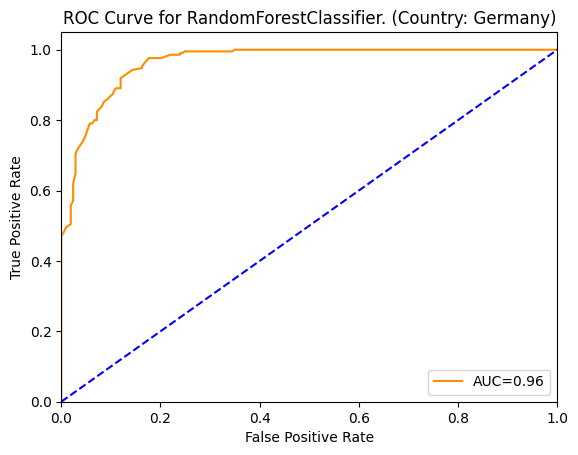

Feature ranking:
1. Feature Q21
2. Feature Q14
3. Feature Q18_1
4. Feature Q12_3
5. Feature Q15

Accuracy for 1. fold: 0.8831
Accuracy for 2. fold: 0.8807
Accuracy for 3. fold: 0.9093
Accuracy for 4. fold: 0.8783
Accuracy for 5. fold: 0.8852
Cross Validation Mean Accuracy: 0.8873
--------------------------------------------------------------------

Evaluation for ExtraTreesClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       209
           1       0.87      0.92      0.89       210

    accuracy                           0.89       419
   macro avg       0.89      0.89      0.89       419
weighted avg       0.89      0.89      0.89       419

Matthews Corrcoef:  0.7771
Accuracy Score:  0.8878


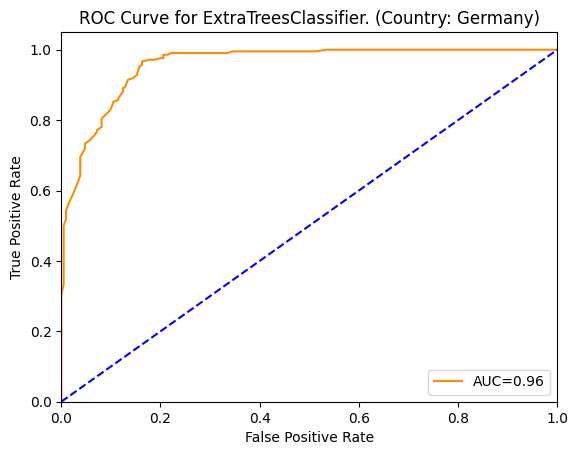


Accuracy for 1. fold: 0.8687
Accuracy for 2. fold: 0.8663
Accuracy for 3. fold: 0.8950
Accuracy for 4. fold: 0.8902
Accuracy for 5. fold: 0.8923
Cross Validation Mean Accuracy: 0.8825
--------------------------------------------------------------------

Evaluation for GradientBoostingClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       209
           1       0.90      0.90      0.90       210

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419

Matthews Corrcoef:  0.7948
Accuracy Score:  0.8974


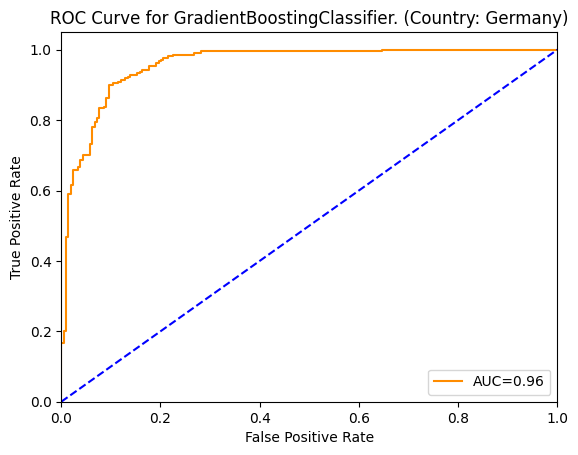


Accuracy for 1. fold: 0.8950
Accuracy for 2. fold: 0.8687
Accuracy for 3. fold: 0.8902
Accuracy for 4. fold: 0.8783
Accuracy for 5. fold: 0.8852
Cross Validation Mean Accuracy: 0.8835
--------------------------------------------------------------------

Evaluation for HistGradientBoostingClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       209
           1       0.88      0.87      0.87       210

    accuracy                           0.87       419
   macro avg       0.87      0.87      0.87       419
weighted avg       0.87      0.87      0.87       419

Matthews Corrcoef:  0.7471
Accuracy Score:  0.8735


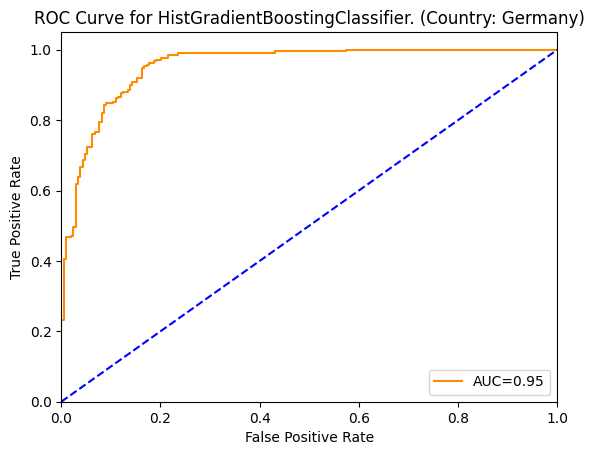


Accuracy for 1. fold: 0.8926
Accuracy for 2. fold: 0.8496
Accuracy for 3. fold: 0.9069
Accuracy for 4. fold: 0.8807
Accuracy for 5. fold: 0.8947
Cross Validation Mean Accuracy: 0.8849
--------------------------------------------------------------------

Evaluation for LinearSVC:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       209
           1       0.82      0.85      0.83       210

    accuracy                           0.83       419
   macro avg       0.83      0.83      0.83       419
weighted avg       0.83      0.83      0.83       419

Matthews Corrcoef:  0.6617
Accuracy Score:  0.8305


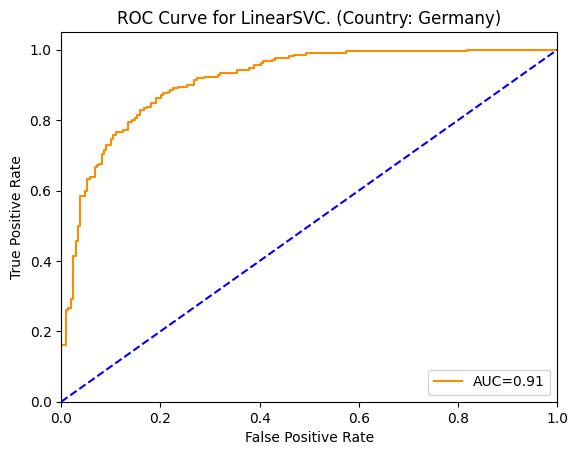


Accuracy for 1. fold: 0.8186
Accuracy for 2. fold: 0.8162
Accuracy for 3. fold: 0.8568
Accuracy for 4. fold: 0.8186
Accuracy for 5. fold: 0.8469
Cross Validation Mean Accuracy: 0.8314
--------------------------------------------------------------------

Evaluation for SGDClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       209
           1       0.76      0.81      0.78       210

    accuracy                           0.78       419
   macro avg       0.78      0.78      0.78       419
weighted avg       0.78      0.78      0.78       419

Matthews Corrcoef:  0.5528
Accuracy Score:  0.7757


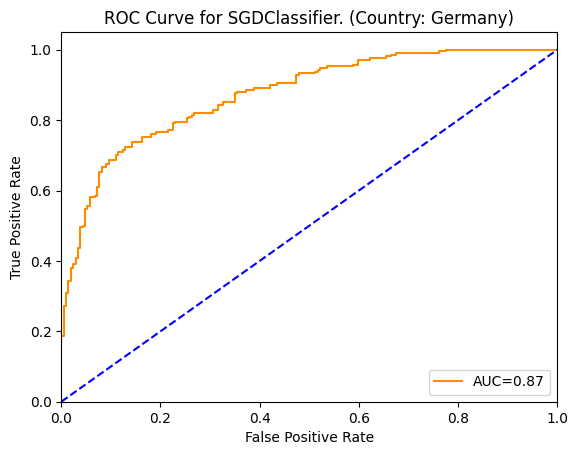


Accuracy for 1. fold: 0.8067
Accuracy for 2. fold: 0.7685
Accuracy for 3. fold: 0.7494
Accuracy for 4. fold: 0.7757
Accuracy for 5. fold: 0.8278
Cross Validation Mean Accuracy: 0.7856
--------------------------------------------------------------------

Evaluation for MLPClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       209
           1       0.88      0.86      0.87       210

    accuracy                           0.87       419
   macro avg       0.87      0.87      0.87       419
weighted avg       0.87      0.87      0.87       419

Matthews Corrcoef:  0.7424
Accuracy Score:  0.8711


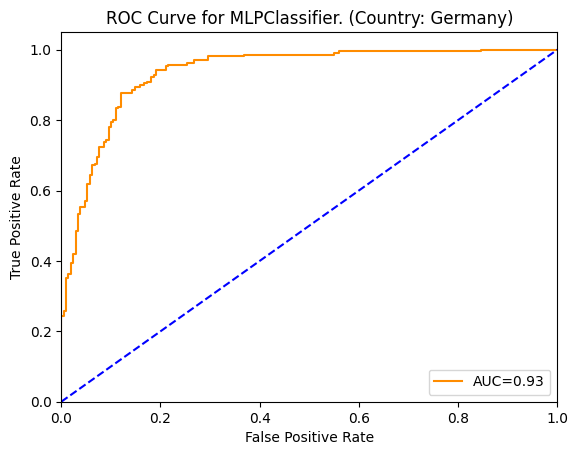


Accuracy for 1. fold: 0.8520
Accuracy for 2. fold: 0.8449
Accuracy for 3. fold: 0.8711
Accuracy for 4. fold: 0.8687
Accuracy for 5. fold: 0.8589
Cross Validation Mean Accuracy: 0.8591
--------------------------------------------------------------------

Evaluation for Perceptron:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       209
           1       0.80      0.88      0.83       210

    accuracy                           0.83       419
   macro avg       0.83      0.83      0.83       419
weighted avg       0.83      0.83      0.83       419

Matthews Corrcoef:  0.6548
Accuracy Score:  0.8258


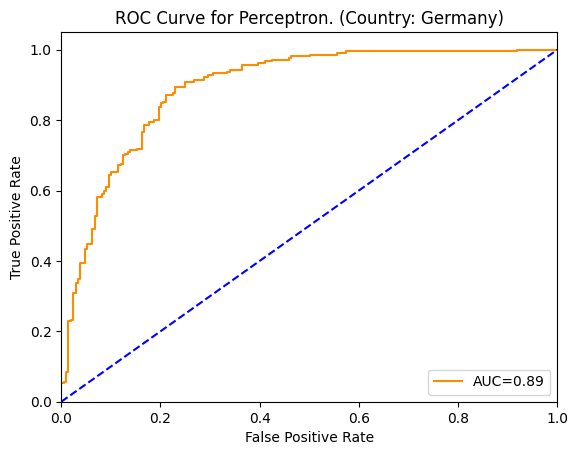


Accuracy for 1. fold: 0.7971
Accuracy for 2. fold: 0.7852
Accuracy for 3. fold: 0.7947
Accuracy for 4. fold: 0.7613
Accuracy for 5. fold: 0.8062
Cross Validation Mean Accuracy: 0.7889
--------------------------------------------------------------------

Evaluation for LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       209
           1       0.82      0.85      0.83       210

    accuracy                           0.83       419
   macro avg       0.83      0.83      0.83       419
weighted avg       0.83      0.83      0.83       419

Matthews Corrcoef:  0.6614
Accuracy Score:  0.8305


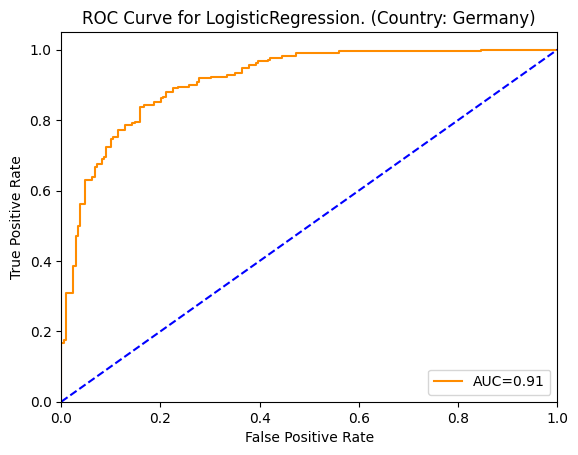


Accuracy for 1. fold: 0.8186
Accuracy for 2. fold: 0.8210
Accuracy for 3. fold: 0.8568
Accuracy for 4. fold: 0.8162
Accuracy for 5. fold: 0.8421
Cross Validation Mean Accuracy: 0.8310
--------------------------------------------------------------------

Evaluation for LogisticRegressionCV:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       209
           1       0.83      0.86      0.85       210

    accuracy                           0.84       419
   macro avg       0.85      0.84      0.84       419
weighted avg       0.85      0.84      0.84       419

Matthews Corrcoef:  0.6901
Accuracy Score:  0.8449


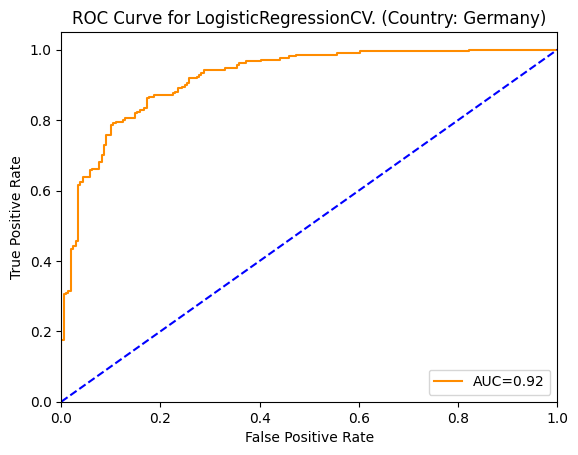


Accuracy for 1. fold: 0.8305
Accuracy for 2. fold: 0.8401
Accuracy for 3. fold: 0.8759
Accuracy for 4. fold: 0.8305
Accuracy for 5. fold: 0.8373
Cross Validation Mean Accuracy: 0.8429
--------------------------------------------------------------------

Evaluation for SVC:
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       209
           1       0.85      0.90      0.87       210

    accuracy                           0.87       419
   macro avg       0.87      0.87      0.87       419
weighted avg       0.87      0.87      0.87       419

Matthews Corrcoef:  0.7389
Accuracy Score:  0.8687


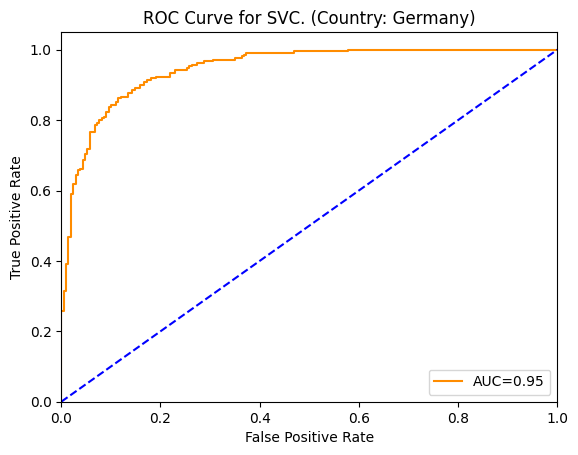


Accuracy for 1. fold: 0.8496
Accuracy for 2. fold: 0.8305
Accuracy for 3. fold: 0.8831
Accuracy for 4. fold: 0.8544
Accuracy for 5. fold: 0.8636
Cross Validation Mean Accuracy: 0.8563
--------------------------------------------------------------------

Evaluation for CalibratedClassifierCV:
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       209
           1       0.82      0.86      0.84       210

    accuracy                           0.84       419
   macro avg       0.84      0.84      0.84       419
weighted avg       0.84      0.84      0.84       419

Matthews Corrcoef:  0.6715
Accuracy Score:  0.8353


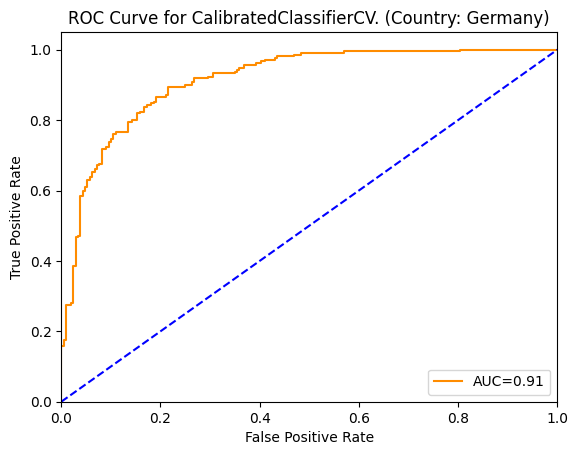


Accuracy for 1. fold: 0.8186
Accuracy for 2. fold: 0.8162
Accuracy for 3. fold: 0.8544
Accuracy for 4. fold: 0.8138
Accuracy for 5. fold: 0.8469
Cross Validation Mean Accuracy: 0.8300
--------------------------------------------------------------------

Evaluation for PassiveAggressiveClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       209
           1       0.80      0.80      0.80       210

    accuracy                           0.80       419
   macro avg       0.80      0.80      0.80       419
weighted avg       0.80      0.80      0.80       419

Matthews Corrcoef:  0.5943
Accuracy Score:  0.7971


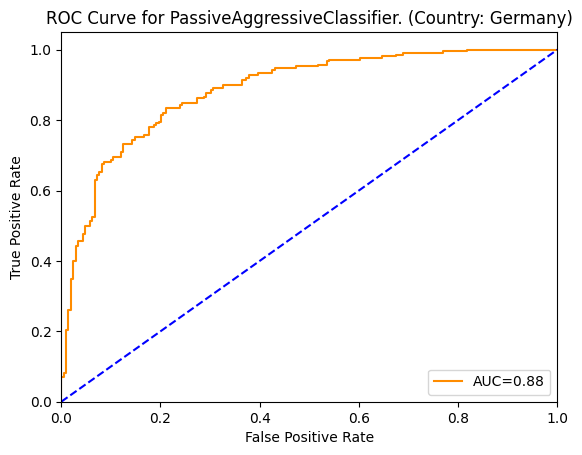


Accuracy for 1. fold: 0.8258
Accuracy for 2. fold: 0.7995
Accuracy for 3. fold: 0.7613
Accuracy for 4. fold: 0.7637
Accuracy for 5. fold: 0.8062
Cross Validation Mean Accuracy: 0.7913
--------------------------------------------------------------------

Evaluation for QuadraticDiscriminantAnalysis:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       209
           1       0.81      0.93      0.86       210

    accuracy                           0.85       419
   macro avg       0.86      0.85      0.85       419
weighted avg       0.86      0.85      0.85       419

Matthews Corrcoef:  0.7166
Accuracy Score:  0.8544


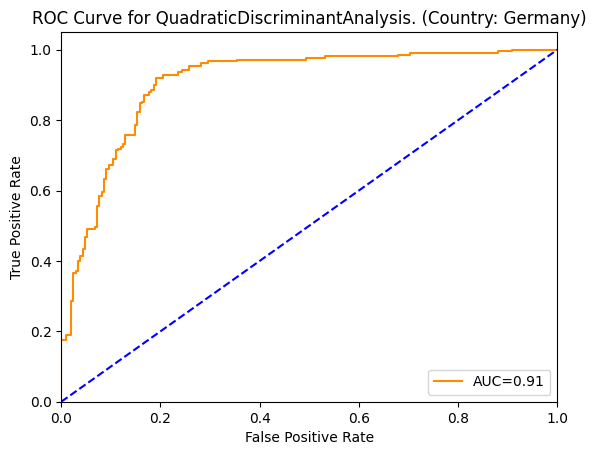


Accuracy for 1. fold: 0.8353
Accuracy for 2. fold: 0.8425
Accuracy for 3. fold: 0.8711
Accuracy for 4. fold: 0.8305
Accuracy for 5. fold: 0.8732
Cross Validation Mean Accuracy: 0.8505
--------------------------------------------------------------------

Evaluation for RidgeClassifierCV:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       209
           1       0.81      0.85      0.83       210

    accuracy                           0.82       419
   macro avg       0.82      0.82      0.82       419
weighted avg       0.82      0.82      0.82       419

Matthews Corrcoef:  0.6478
Accuracy Score:  0.8234


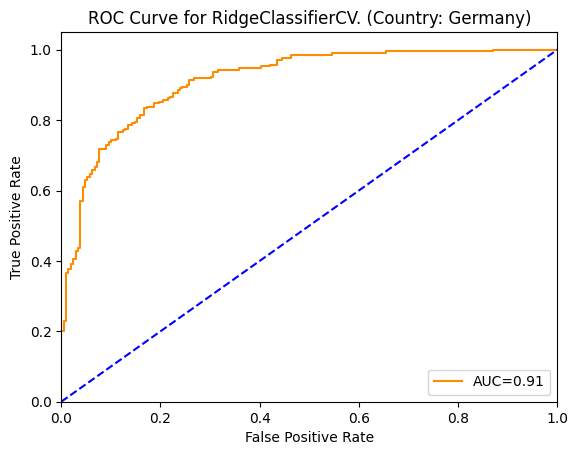


Accuracy for 1. fold: 0.8091
Accuracy for 2. fold: 0.8305
Accuracy for 3. fold: 0.8663
Accuracy for 4. fold: 0.8138
Accuracy for 5. fold: 0.8373
Cross Validation Mean Accuracy: 0.8314
--------------------------------------------------------------------

Evaluation for RidgeClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       209
           1       0.80      0.85      0.83       210

    accuracy                           0.82       419
   macro avg       0.82      0.82      0.82       419
weighted avg       0.82      0.82      0.82       419

Matthews Corrcoef:  0.6432
Accuracy Score:  0.8210


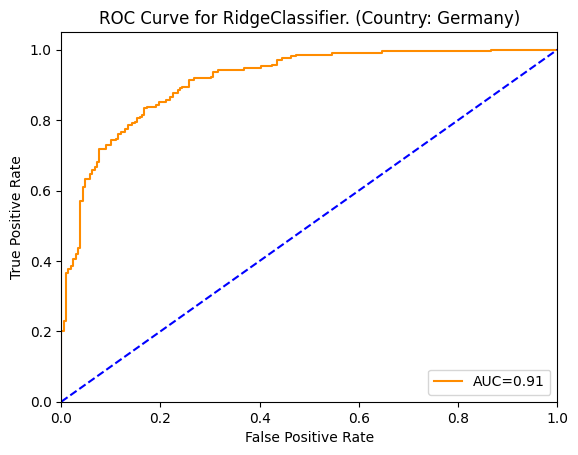


Accuracy for 1. fold: 0.8091
Accuracy for 2. fold: 0.8305
Accuracy for 3. fold: 0.8663
Accuracy for 4. fold: 0.8115
Accuracy for 5. fold: 0.8373
Cross Validation Mean Accuracy: 0.8309
--------------------------------------------------------------------

Evaluation for AdaBoostClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       209
           1       0.89      0.86      0.87       210

    accuracy                           0.88       419
   macro avg       0.88      0.88      0.88       419
weighted avg       0.88      0.88      0.88       419

Matthews Corrcoef:  0.7524
Accuracy Score:  0.8759


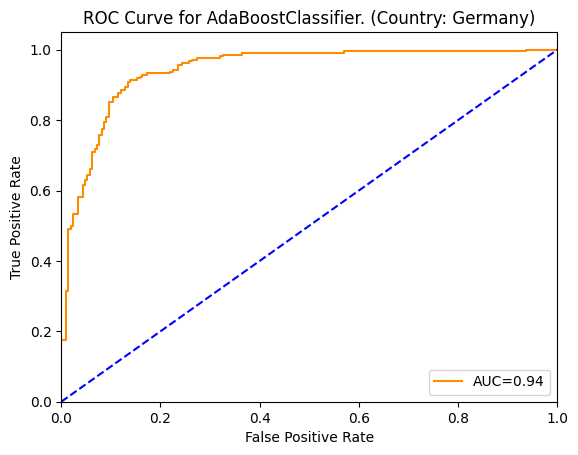


Accuracy for 1. fold: 0.8735
Accuracy for 2. fold: 0.8520
Accuracy for 3. fold: 0.8592
Accuracy for 4. fold: 0.8616
Accuracy for 5. fold: 0.8565
Cross Validation Mean Accuracy: 0.8606
--------------------------------------------------------------------

Evaluation for KNeighborsClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.95      0.80       209
           1       0.92      0.58      0.71       210

    accuracy                           0.76       419
   macro avg       0.80      0.76      0.76       419
weighted avg       0.81      0.76      0.76       419

Matthews Corrcoef:  0.5675
Accuracy Score:  0.7637


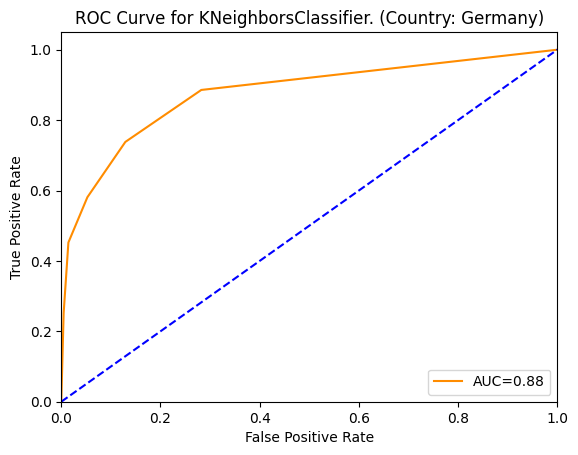


Accuracy for 1. fold: 0.7399
Accuracy for 2. fold: 0.7804
Accuracy for 3. fold: 0.7589
Accuracy for 4. fold: 0.7279
Accuracy for 5. fold: 0.7512
Cross Validation Mean Accuracy: 0.7517
--------------------------------------------------------------------

Evaluation for BaggingClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       209
           1       0.89      0.81      0.85       210

    accuracy                           0.85       419
   macro avg       0.85      0.85      0.85       419
weighted avg       0.85      0.85      0.85       419

Matthews Corrcoef:  0.7067
Accuracy Score:  0.8520


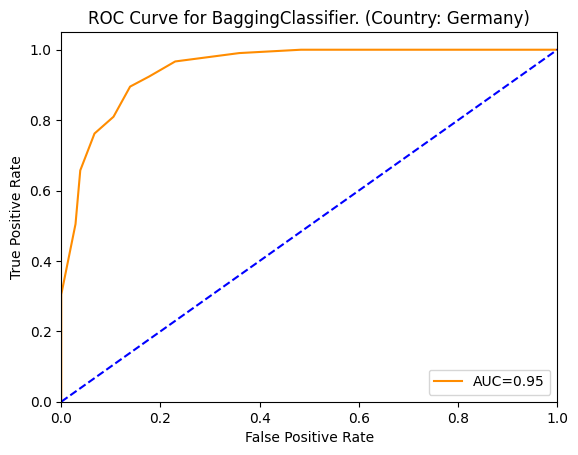


Accuracy for 1. fold: 0.8735
Accuracy for 2. fold: 0.8258
Accuracy for 3. fold: 0.8854
Accuracy for 4. fold: 0.8616
Accuracy for 5. fold: 0.8708
Cross Validation Mean Accuracy: 0.8634
--------------------------------------------------------------------

Evaluation for BernoulliNB:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       209
           1       0.82      0.87      0.84       210

    accuracy                           0.84       419
   macro avg       0.84      0.84      0.84       419
weighted avg       0.84      0.84      0.84       419

Matthews Corrcoef:  0.6811
Accuracy Score:  0.8401


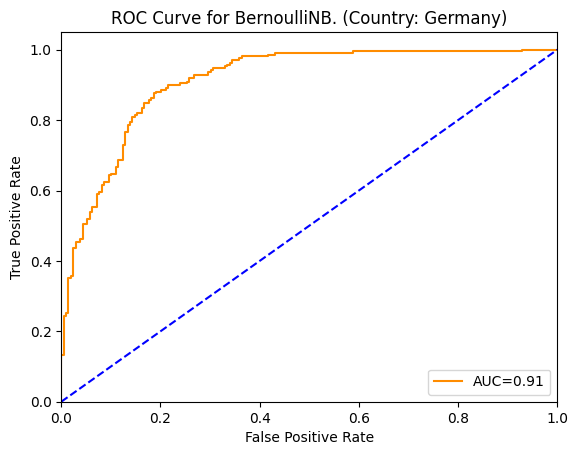


Accuracy for 1. fold: 0.7971
Accuracy for 2. fold: 0.8305
Accuracy for 3. fold: 0.8592
Accuracy for 4. fold: 0.8210
Accuracy for 5. fold: 0.8373
Cross Validation Mean Accuracy: 0.8290
--------------------------------------------------------------------

Evaluation for LinearDiscriminantAnalysis:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       209
           1       0.80      0.85      0.83       210

    accuracy                           0.82       419
   macro avg       0.82      0.82      0.82       419
weighted avg       0.82      0.82      0.82       419

Matthews Corrcoef:  0.6432
Accuracy Score:  0.8210


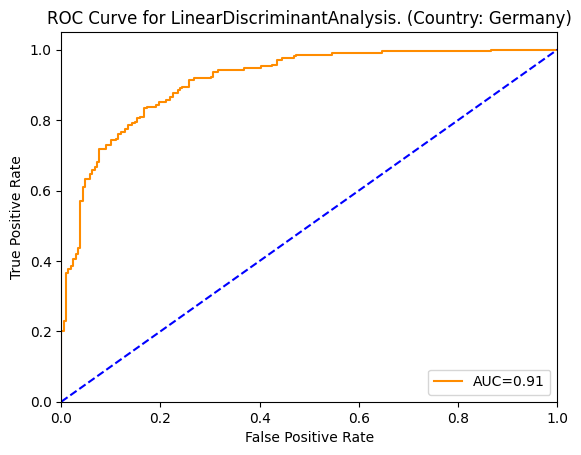


Accuracy for 1. fold: 0.8091
Accuracy for 2. fold: 0.8305
Accuracy for 3. fold: 0.8663
Accuracy for 4. fold: 0.8115
Accuracy for 5. fold: 0.8373
Cross Validation Mean Accuracy: 0.8309
--------------------------------------------------------------------

Evaluation for GaussianNB:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       209
           1       0.82      0.87      0.85       210

    accuracy                           0.84       419
   macro avg       0.84      0.84      0.84       419
weighted avg       0.84      0.84      0.84       419

Matthews Corrcoef:  0.6815
Accuracy Score:  0.8401


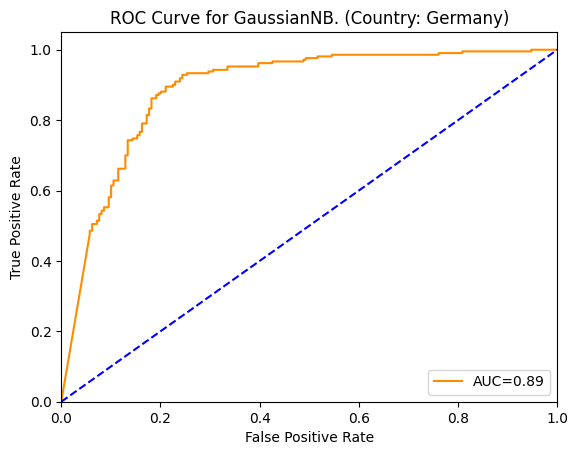


Accuracy for 1. fold: 0.8282
Accuracy for 2. fold: 0.8091
Accuracy for 3. fold: 0.8520
Accuracy for 4. fold: 0.8091
Accuracy for 5. fold: 0.8397
Cross Validation Mean Accuracy: 0.8276
--------------------------------------------------------------------

Evaluation for NuSVC:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       209
           1       0.82      0.91      0.86       210

    accuracy                           0.85       419
   macro avg       0.86      0.85      0.85       419
weighted avg       0.86      0.85      0.85       419

Matthews Corrcoef:  0.7086
Accuracy Score:  0.8520


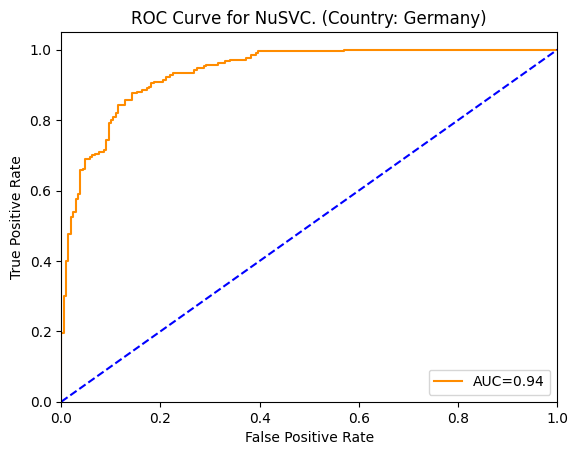


Accuracy for 1. fold: 0.8377
Accuracy for 2. fold: 0.8282
Accuracy for 3. fold: 0.8807
Accuracy for 4. fold: 0.8329
Accuracy for 5. fold: 0.8612
Cross Validation Mean Accuracy: 0.8481
--------------------------------------------------------------------

Evaluation for DecisionTreeClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       209
           1       0.85      0.81      0.83       210

    accuracy                           0.84       419
   macro avg       0.84      0.84      0.84       419
weighted avg       0.84      0.84      0.84       419

Matthews Corrcoef:  0.6716
Accuracy Score:  0.8353


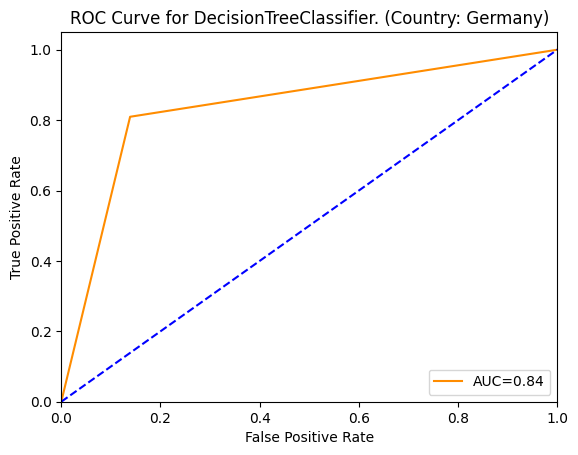


Accuracy for 1. fold: 0.8282
Accuracy for 2. fold: 0.8258
Accuracy for 3. fold: 0.8592
Accuracy for 4. fold: 0.8258
Accuracy for 5. fold: 0.8325
Cross Validation Mean Accuracy: 0.8343
--------------------------------------------------------------------

Evaluation for ExtraTreeClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       209
           1       0.82      0.74      0.78       210

    accuracy                           0.79       419
   macro avg       0.79      0.79      0.79       419
weighted avg       0.79      0.79      0.79       419

Matthews Corrcoef:  0.5827
Accuracy Score:  0.7900


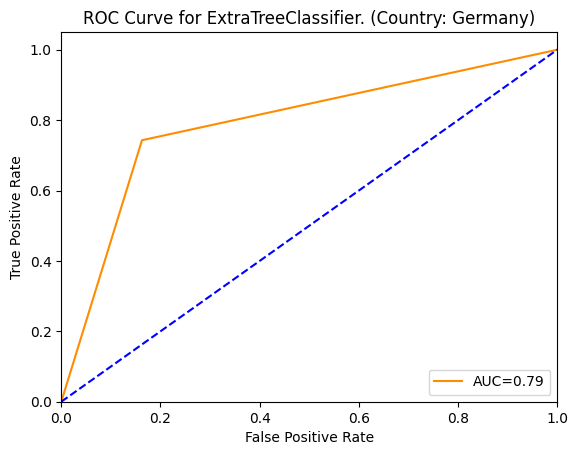


Accuracy for 1. fold: 0.7900
Accuracy for 2. fold: 0.8138
Accuracy for 3. fold: 0.8234
Accuracy for 4. fold: 0.7589
Accuracy for 5. fold: 0.7967
Cross Validation Mean Accuracy: 0.7966
--------------------------------------------------------------------


In [30]:
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    SGDClassifier, LogisticRegression, LogisticRegressionCV, Perceptron, RidgeClassifierCV,
    RidgeClassifier, PassiveAggressiveClassifier
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import (
    QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
)
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier


results = []

# List of classifiers
classifiers = [
    RandomForestClassifier(random_state = 42),
    ExtraTreesClassifier(random_state = 42),
    GradientBoostingClassifier(random_state = 42),
    HistGradientBoostingClassifier(random_state = 42), 
    LinearSVC(random_state = 42),                      
    SGDClassifier(random_state = 42),                 
    MLPClassifier(random_state = 42),                  
    Perceptron(random_state = 42),                     
    LogisticRegression(random_state = 42),             
    LogisticRegressionCV(random_state = 42),           
    SVC(random_state = 42),                            
    CalibratedClassifierCV(),         
    PassiveAggressiveClassifier(random_state = 42),                                           
    QuadraticDiscriminantAnalysis(),  
    RidgeClassifierCV(),              
    RidgeClassifier(random_state = 42),                
    AdaBoostClassifier(random_state = 42),             
    KNeighborsClassifier(),           
    BaggingClassifier(random_state = 42),              
    BernoulliNB(),                    
    LinearDiscriminantAnalysis(),     
    GaussianNB(),                     
    NuSVC(random_state = 42),                          
    DecisionTreeClassifier(random_state = 42),                         
    ExtraTreeClassifier(random_state = 42),                         
]


for clf in classifiers:
    
    print(f"\nEvaluation for {clf.__class__.__name__}:")
    performance_results = evaluatePerformance(clf)
    performance_result_crossVal = evaluatePerformance_crossVal(clf)
    results.append((clf.__class__.__name__, 
                    {
                        "Cross Validation CA": round(performance_result_crossVal, 3),
                        "Train/Test Split CA": round(performance_results[0], 3),
                        "F1 Score": round(performance_results[1], 3),
                        "Precision": round(performance_results[2], 3),
                        "Recall": round(performance_results[3], 3),
                        "AUC": round(performance_results[4], 3),
                        "MCC": round(performance_results[5], 3),
                    }
                   ))
    print("--------------------------------------------------------------------")

In [31]:
results = sorted(results, key=lambda x: x[1]["Cross Validation CA"], reverse=True)
results = results[:5]
print(results)

[('RandomForestClassifier', {'Cross Validation CA': 0.887, 'Train/Test Split CA': 0.897, 'F1 Score': 0.899, 'Precision': 0.885, 'Recall': 0.914, 'AUC': 0.965, 'MCC': 0.795}), ('HistGradientBoostingClassifier', {'Cross Validation CA': 0.885, 'Train/Test Split CA': 0.874, 'F1 Score': 0.873, 'Precision': 0.879, 'Recall': 0.867, 'AUC': 0.954, 'MCC': 0.747}), ('ExtraTreesClassifier', {'Cross Validation CA': 0.883, 'Train/Test Split CA': 0.888, 'F1 Score': 0.891, 'Precision': 0.865, 'Recall': 0.919, 'AUC': 0.958, 'MCC': 0.777}), ('GradientBoostingClassifier', {'Cross Validation CA': 0.883, 'Train/Test Split CA': 0.897, 'F1 Score': 0.898, 'Precision': 0.896, 'Recall': 0.9, 'AUC': 0.957, 'MCC': 0.795}), ('BaggingClassifier', {'Cross Validation CA': 0.863, 'Train/Test Split CA': 0.852, 'F1 Score': 0.846, 'Precision': 0.885, 'Recall': 0.81, 'AUC': 0.948, 'MCC': 0.707})]


In [32]:

results_excel = pd.DataFrame(results, columns=['Classifier', 'Metrics'])


results_excel['Combined'] = results_excel['Classifier'] + ': ' + results_excel['Metrics'].astype(str)


results_excel[['Combined']].to_excel('classifier_metrics_combined.xlsx', index=False, header=False)